# Created by Cmoon-Cyl

In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
def synthetic_data(num=1000):
    """生成近似sin函数的数据集。"""
    X=torch.linspace(-2*np.pi,2*np.pi,steps=num,dtype=torch.float32).reshape(-1,1).to(device)
    Y=torch.sin(X)
    return X, Y

In [3]:
def load_array(data_arrays, batch_size, is_train=True): 
    """构造一个PyTorch数据迭代器。"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [4]:
batch_size = 256
features,labels=synthetic_data(5000)
data_iter = load_array((features, labels), batch_size)

In [5]:
net1 = nn.Sequential(nn.Linear(1,10),nn.ReLU(),
                    nn.Linear(10,128),nn.ReLU(),
                    nn.Linear(128,10),nn.ReLU(),
                    nn.Linear(10,1)).to(device)
net2 = nn.Sequential(nn.Linear(1,10),nn.Sigmoid(),
                    nn.Linear(10,128),nn.Sigmoid(),
                    nn.Linear(128,10),nn.Sigmoid(),
                    nn.Linear(10,1)).to(device)
loss=nn.MSELoss()

In [6]:
def train(net,epoch):
    train_loss=[];
    num_epochs = epoch
    optim = torch.optim.Adam(net.parameters(), lr=8e-3,weight_decay=1e-4)
    scheduler=torch.optim.lr_scheduler.CosineAnnealingLR(optim, 500)
    activate='ReLU' if net==net1 else 'Sigmoid'
    for epoch in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X) ,y)
            optim.zero_grad()
            l.backward()
            optim.step()
        scheduler.step()
        train_loss.append(l)
        if (epoch+1)%50==0:
            l = loss(net(features), labels)
            print(f"Activate:{activate}, Epoch:{epoch+1}, MSE:{l}, Device:{l.device}, lr:{scheduler.get_last_lr()[0]}")
    return train_loss

In [7]:
train_loss1=train(net1,200)
train_loss2=train(net2,200)

Activate:ReLU, Epoch:50, MSE:0.0008093035430647433, Device:cuda:0, lr:0.00780422606518061
Activate:ReLU, Epoch:100, MSE:0.000768437166698277, Device:cuda:0, lr:0.007236067977499781
Activate:ReLU, Epoch:150, MSE:0.00018149158859159797, Device:cuda:0, lr:0.006351141009169884
Activate:ReLU, Epoch:200, MSE:0.0002494287327863276, Device:cuda:0, lr:0.005236067977499782
Activate:Sigmoid, Epoch:50, MSE:0.03646976873278618, Device:cuda:0, lr:0.00780422606518061
Activate:Sigmoid, Epoch:100, MSE:0.018719259649515152, Device:cuda:0, lr:0.007236067977499781
Activate:Sigmoid, Epoch:150, MSE:0.0015106420032680035, Device:cuda:0, lr:0.006351141009169884
Activate:Sigmoid, Epoch:200, MSE:0.0011842594249173999, Device:cuda:0, lr:0.005236067977499782


In [8]:
def plot_loss(loss):
    activate='ReLU' if loss==train_loss1 else 'Sigmoid'
    plt.plot(range(0,len(loss)),loss,label="loss")
    plt.title(f"{activate} Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.show()
    
def plot_result(net):
    predict=net(features)
    activate='ReLU' if net==net1 else 'Sigmoid'
    plt.plot(features.to('cpu'),labels.to('cpu'),label="Ground Truth")
    plt.plot(features.to('cpu'),predict.detach().to('cpu').numpy(),label="Predict")
    plt.title(f"{activate} Result")
    plt.xlabel("X")
    plt.ylabel("Sin(X)")
    plt.legend()
    plt.show()

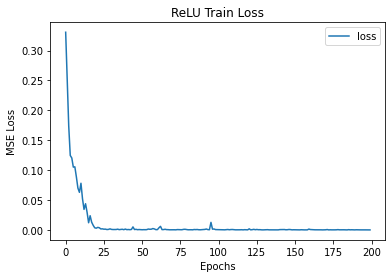

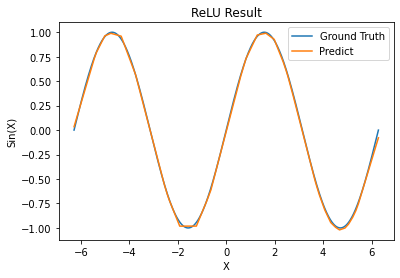

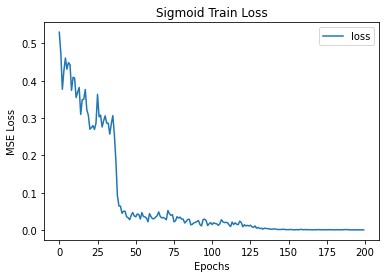

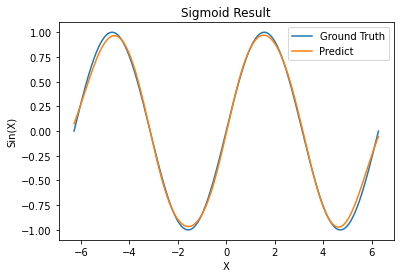

In [9]:
plot_loss(train_loss1)
plot_result(net1)
plot_loss(train_loss2)
plot_result(net2)